# **Segundo avance PIA**
## Grupo 001 - Lunes 7-10 PM
## Equipo 9
+ 1842161 Torres Guerrero Saul Ángel
+ 1844656 Maldonado Ramirez Alejandra
+ 1857712 Morales Tovar Carlos de Jesús
+ 1941500 Espinosa Orrante Jesús Alejandro
+ 1857810 Rivera Castillo Saúl Andrés



## **Stock Exchange Data** 
URL: https://www.kaggle.com/mattiuzc/stock-exchange-data 

### **Descripción de los datos** 

 
*   Esta base contiene datos diarios de los puntos (o precios) de índices bursátiles de todo el mundo como: Estados Unidos, Canadá, Japón, Alemania, China, etc. Estos datos que nos muestran son recopilados de Yahoo Finance y son cotizados en la moneda nacional en donde se encuentra cada cambio, además de su precio de cierre convertido al dólar estadounidense.

* Un **índice bursátil** es un indicador de la bolsa de valores que actúa como un termómetro: tiene la capacidad de hacernos ver, en un solo vistazo, el movimiento mayoritario de las empresas de dicho mercado. 

**Descripción de columnas**

Los tipos de datos que nos presentan son en su mayoría números, enteros o decimales, también nos dan fechas.

* Index: Siglas del índice
* Date: Fecha de observación
* Open: Precio de apertura
* High: Precio más alto que tuvo el índice en todo el día
* Low: Precio más bajo que tuvo el índice en todo el día
* Close: Precio de cierre, es decir el precio con el que la acción termino el día
* Adj Close: Precio de cierre ajustado a dividendos y divisiones, prácticamente es igual al precio de cierre
* Volume: Número de acciones que se negociaron en el día
* CloseUSD: Precio de cierre en dólares




### **Justificación del uso de Datos** 


  * Una de las características que nos llamó más la atención es que la base nos muestra diferentes índices bursátiles y sus valores con el paso del tiempo, teniendo referencia de otras materias como Productos Financieros Derivados sobre los tipos de inversiones que se pueden realizar con los índices nos empujó a considerar esta base.

*   Lo que nos beneficia de trabajar con esta base de datos es tener información organizada sobre distintos índices de todo el mundo, además de una columna dedicada a convertir todos los precios al dolár estadounidense lo cual hace la información más manejable.

### **Objetivos** 


*   Objetivo Principal: Realizar predicciones sobre los índices bursátiles.
*   Objetivos Secundarios: Comparar el comportamiento de los índices a través del tiempo.






   









## **DESARROLLO DE HERRAMIENTAS**  
### **1. Limpieza de Datos** 

In [ ]:
import pandas as pd
import numpy as np
import json
#Importando la base de datos bajo el nombre IP
IP = pd.read_csv("indexProcessed.csv", encoding='utf8')

In [ ]:
#Cantidad de filas y columnas
IP.shape

(104224, 9)

In [ ]:
#Mostrando las primeras 6 filas de la base de datos IP
IP.head(6)

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013
5,HSI,1987-01-08,2603.300049,2603.300049,2603.300049,2603.300049,2603.300049,0.0,338.429006


In [ ]:
#Desplegando el nombre de todas las columnas que conforman la base de datos IP
IP.columns

Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'CloseUSD'],
      dtype='object')

In [ ]:
#Indicando el tipo de dato que contiene cada columna de la base de datos IP
#Verificando la presencia o no de datos nulos en cada columna de la base de datos IP
for i in range(0,9):
    print("La columna",IP.columns[i],"contiene datos de tipo",IP[IP.columns[i]].dtype)
    DN=IP.isnull().any()[IP.columns[i]]
    if DN == False:
      print("La columna",IP.columns[i],"no presenta datos nulos")
      print()
    else:
      print("La columna",IP.columns[i],"presenta",IP.isnull().sum()[IP.columns[i]],"datos nulos")
      print()

La columna Index contiene datos de tipo object
La columna Index no presenta datos nulos

La columna Date contiene datos de tipo object
La columna Date no presenta datos nulos

La columna Open contiene datos de tipo float64
La columna Open no presenta datos nulos

La columna High contiene datos de tipo float64
La columna High no presenta datos nulos

La columna Low contiene datos de tipo float64
La columna Low no presenta datos nulos

La columna Close contiene datos de tipo float64
La columna Close no presenta datos nulos

La columna Adj Close contiene datos de tipo float64
La columna Adj Close no presenta datos nulos

La columna Volume contiene datos de tipo float64
La columna Volume no presenta datos nulos

La columna CloseUSD contiene datos de tipo float64
La columna CloseUSD no presenta datos nulos



In [ ]:
#Eliminando columnas
NIP=IP.drop(columns=['Open','High','Low','Close','Adj Close'])
NIP.head(6)

,Index,Date,Volume,CloseUSD
0,HSI,1986-12-31,0.0,333.879006
1,HSI,1987-01-02,0.0,330.213013
2,HSI,1987-01-05,0.0,331.811987
3,HSI,1987-01-06,0.0,335.906987
4,HSI,1987-01-07,0.0,338.923013
5,HSI,1987-01-08,0.0,338.429006


Se eliminaron las columnas Open, High, Low, Close y Adj Close porque para nuestro objetivo lo más eficiente es tener todos los datos en la misma moneda (USD), aparte de que eran redundantes entre ellas.

### **2. Estadística básica de los datos** 


In [ ]:
#Resumen estadístico de la columna CloseUSD
NIP['CloseUSD'].describe()

count    104224.000000
mean       3046.729177
std        3747.865623
min          10.204900
25%         320.460898
50%        1371.598486
75%        4383.045241
max       18934.376173
Name: CloseUSD, dtype: float64

In [ ]:
NYA=NIP[NIP.Index=="NYA"]

In [ ]:
#Resumen estadístico de la columna CloseUSD solo del índice NYA
NYA['CloseUSD'].describe()

count    13947.000000
mean      4452.174711
std       4075.459366
min        347.769989
25%        654.940002
50%       2631.800049
75%       7337.935059
max      16590.429690
Name: CloseUSD, dtype: float64

Con el resumen estadístico encontramos que tenemos una gran cantidad de observaciones del índice NYA y un promedio de puntos mayor al que se tiene de todos los índices en general.

## **3. Gráficas** 

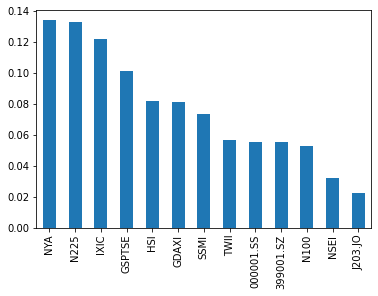

In [ ]:
(NIP['Index'].value_counts() / len(NIP)).plot.bar()

Con esta gráfica nos podemos dar cuenta que el índice "NYA" abarca el mayor porcentaje de observaciones, para tener gráficas con resultados más específicos podemos realizarlos con los datos de este índice.

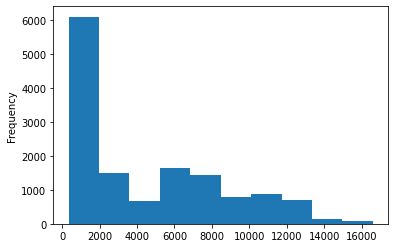

In [ ]:
NYA['CloseUSD'].plot.hist()

Observamos que la mayor parte de las observaciones de puntos del índice están situadas en el intervalo de 347 a 2000

In [ ]:
NNIP = pd.read_csv("indexProcessed.csv",parse_dates=['Date'],index_col= ['Date'])

In [ ]:
NNYA=NNIP[NNIP.Index=="NYA"]
NNYA.head(5)

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1965-12-31,NYA,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,528.690002
1966-01-03,NYA,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,527.210022
1966-01-04,NYA,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,527.840027
1966-01-05,NYA,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,531.119995
1966-01-06,NYA,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,532.070007


In [ ]:
ENYA=NNYA.drop(columns=['Open','High','Low','Close','Adj Close'])
ENYA.head(6)

,Index,Volume,CloseUSD
Date,,,
1965-12-31,NYA,0.0,528.690002
1966-01-03,NYA,0.0,527.210022
1966-01-04,NYA,0.0,527.840027
1966-01-05,NYA,0.0,531.119995
1966-01-06,NYA,0.0,532.070007
1966-01-07,NYA,0.0,532.599976


In [ ]:
IPP = ENYA['2020-01-01':'2021-01-01']
IPP.head()

,Index,Volume,CloseUSD
Date,,,
2020-01-02,NYA,3.458250e+09,14002.49023
2020-01-03,NYA,3.461290e+09,13917.04981
2020-01-06,NYA,3.674070e+09,13941.79981
2020-01-07,NYA,3.420380e+09,13898.45020
2020-01-08,NYA,3.720890e+09,13934.44043


In [ ]:
IPP.reset_index()

,Date,Index,Volume,CloseUSD
0,2020-01-02,NYA,3.458250e+09,14002.49023
1,2020-01-03,NYA,3.461290e+09,13917.04981
2,2020-01-06,NYA,3.674070e+09,13941.79981
3,2020-01-07,NYA,3.420380e+09,13898.45020
4,2020-01-08,NYA,3.720890e+09,13934.44043
...,...,...,...,...
248,2020-12-24,NYA,1.885090e+09,14382.50000
249,2020-12-28,NYA,3.527460e+09,14405.76953
250,2020-12-29,NYA,3.387030e+09,14397.91992
251,2020-12-30,NYA,3.145200e+09,14477.48047


Realizamos los pasos anteriores para aislar el intervalo que comprende el año 2020 y de esa forma la gráfica de dispersión se pueda entender mejor

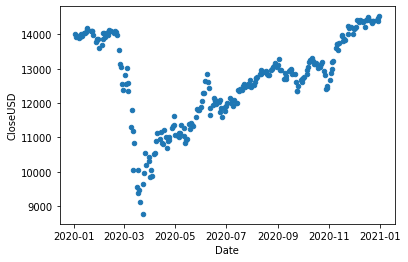

In [ ]:
IPP.reset_index().plot.scatter(x='Date', y='CloseUSD')

Con la gráfica de dispersión del 2020 para el índice NYA podemos ver que se vio afectado en el primer trimestre muy probablemente debido a los efectos del COVID-19 en la economía mundial, recuperandose poco a poco a lo largo del año.

In [ ]:
N225=NNIP[NNIP.Index=="N225"]
N225.head(5)

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1965-01-05,N225,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0.0,12.577200
1965-01-06,N225,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0.0,12.639900
1965-01-07,N225,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0.0,12.742700
1965-01-08,N225,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0.0,12.864301
1965-01-12,N225,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,0.0,12.885400


In [ ]:
EN225=N225.drop(columns=['Open','High','Low','Close','Adj Close'])
EN225.head(6)

,Index,Volume,CloseUSD
Date,,,
1965-01-05,N225,0.0,12.577200
1965-01-06,N225,0.0,12.639900
1965-01-07,N225,0.0,12.742700
1965-01-08,N225,0.0,12.864301
1965-01-12,N225,0.0,12.885400
1965-01-13,N225,0.0,12.816700


In [ ]:
N2P = EN225['2020-01-01':'2021-01-01']
N2P.head()

,Index,Volume,CloseUSD
Date,,,
2020-01-06,N225,72800000.0,232.048594
2020-01-07,N225,64300000.0,235.757207
2020-01-08,N225,79400000.0,232.047598
2020-01-09,N225,62200000.0,237.398691
2020-01-10,N225,55900000.0,238.505703


In [ ]:
N2P.reset_index()

,Date,Index,Volume,CloseUSD
0,2020-01-06,N225,72800000.0,232.048594
1,2020-01-07,N225,64300000.0,235.757207
2,2020-01-08,N225,79400000.0,232.047598
3,2020-01-09,N225,62200000.0,237.398691
4,2020-01-10,N225,55900000.0,238.505703
...,...,...,...,...
237,2020-12-24,N225,47900000.0,266.683496
238,2020-12-25,N225,33400000.0,266.566094
239,2020-12-28,N225,50700000.0,268.540293
240,2020-12-29,N225,59400000.0,275.681504


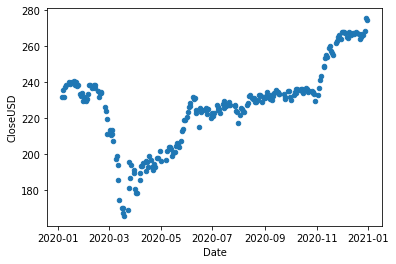

In [ ]:
N2P.reset_index().plot.scatter(x='Date', y='CloseUSD')

Comparando la gráfica de dispersión del índice N225 de Japón del año 2020 con la del NYA podemos apreciar que son bastante similares, esto debido a que ambos mercados se vieron afectados por la pandemia. Si revisaramos todos los índices disponibles en la base probablemente encontraríamos la misma situación. 

Text(0.5, 1.0, 'N225')

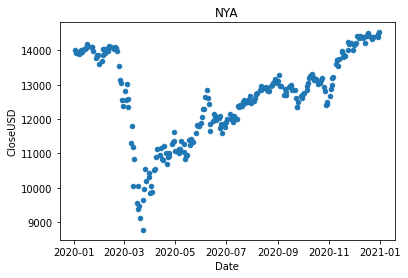

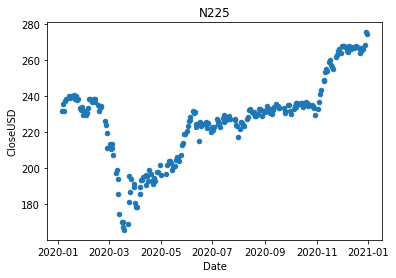

In [ ]:
#Comparación
IPP.reset_index().plot.scatter(x='Date', y='CloseUSD')
plt.title("NYA")
N2P.reset_index().plot.scatter(x='Date', y='CloseUSD')
plt.title("N225")

In [ ]:
TI=NNIP[(NNIP["Index"]=="NYA") | (NNIP["Index"]=="N225")| (NNIP["Index"]=="HSI") | (NNIP["Index"]=="IXIC") | (NNIP["Index"]=="GSPTSE")]
TI.head()

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1986-12-31,HSI,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1987-01-02,HSI,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
1987-01-05,HSI,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
1987-01-06,HSI,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
1987-01-07,HSI,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [ ]:
NTI=TI.drop(columns=['Open','High','Low','Close','Adj Close'])
NTI.head()

,Index,Volume,CloseUSD
Date,,,
1986-12-31,HSI,0.0,333.879006
1987-01-02,HSI,0.0,330.213013
1987-01-05,HSI,0.0,331.811987
1987-01-06,HSI,0.0,335.906987
1987-01-07,HSI,0.0,338.923013


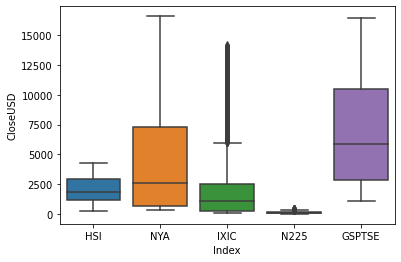

In [ ]:
import seaborn as sns
sns.boxplot(x='Index', y='CloseUSD', data=NTI)

Comparando los boxplot, notamos que el índice HSI es el más "estable" a través del tiempo por lo que sería el más facil de predecir para un futuro cercano. Esto se debe a que la mayoría de los precios de cierre se encuentran dentro de la caja provocando así que sus bigotes no sean tan largos. Por el contrario, el índice IXIC es el más "volatil" ya que presenta demasiados datos atípicos.

## **Conclusión General**

Con los resumenes estadísticos y las gráficas de barras nos dimos cuenta que el índice NYA de la NYSE era el que tenía mayor número de observaciones en nuestra base de datos y su promedio está por encima del general. Gracias a lo anterior empezamos a tomar en cuenta el NYA para realizar comparaciones entre los índices, el cual es nuestro objetivo secundario.